<a href="https://colab.research.google.com/github/sharif181/food-business-analysis/blob/main/Sharif_food_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Topic name: Food business analysis and prediction using Machine Learning.

Members info:

1. Md Sharif khan      ID: 181-15-2002
2. Md Jahid Hasan      ID: 181-15-1905
3. Md Masidul Hasan    ID: 181-15-1947



#***Importing libary and Mounting***

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#**Import Data and test**

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ML-Project/fooddata.csv")
print(df.head())

     Age Gender  ... Cost_rest_month                 Food_type
0  16-30   Male  ...        501-1000  Traditional bengali food
1  16-30   Male  ...           1-500  Traditional bengali food
2  16-30   Male  ...           1-500                 Fast food
3  16-30   Male  ...           1-500  Traditional bengali food
4  16-30   Male  ...           1-500                 Fast food

[5 rows x 19 columns]


#**Print columns name**

In [ ]:
df.columns

Index(['Age', 'Gender', 'Marital_status', 'Division', 'Home_town',
       'Living_Town', 'Is_urban', 'Work', 'Income',
       'take_food_from_restuarent_month', 'Order_food_from_online_month',
       'Spicy', 'Sweet', 'Preferable_price_BDT', 'New_recipe', 'Street_food',
       'Restuarent_food', 'Cost_rest_month', 'Food_type'],
      dtype='object')

In [ ]:
df.shape

(422, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Age                              422 non-null    object
 1   Gender                           422 non-null    object
 2   Marital_status                   422 non-null    object
 3   Division                         422 non-null    object
 4   Home_town                        422 non-null    object
 5   Living_Town                      422 non-null    object
 6   Is_urban                         422 non-null    object
 7   Work                             422 non-null    object
 8   Income                           422 non-null    object
 9   take_food_from_restuarent_month  422 non-null    object
 10  Order_food_from_online_month     422 non-null    object
 11  Spicy                            422 non-null    int64 
 12  Sweet                            422

In [ ]:
df.isnull().sum()

Age                                0
Gender                             0
Marital_status                     0
Division                           0
Home_town                          0
Living_Town                        0
Is_urban                           0
Work                               0
Income                             0
take_food_from_restuarent_month    0
Order_food_from_online_month       0
Spicy                              0
Sweet                              0
Preferable_price_BDT               0
New_recipe                         0
Street_food                        0
Restuarent_food                    0
Cost_rest_month                    0
Food_type                          0
dtype: int64

#**Cleaning**

In [ ]:
mdf = [df]

In [ ]:
for dataset in mdf:
  dataset["Age"] = dataset["Age"].replace("0-15",0)
  dataset["Age"] = dataset["Age"].replace("16-30",1)
  dataset["Age"] = dataset["Age"].replace("31-45",2)
  dataset["Age"] = dataset["Age"].replace("45+",3)

In [ ]:
gender_map = {"Male":0,"Female":1,"Other":2}
for data in mdf:
  data['Gender'] = data['Gender'].map(gender_map)

In [ ]:
marrital_status_map = {"Married":0,"Unmarried":1}
for data in mdf:
  data['Marital_status'] = data['Marital_status'].map(marrital_status_map)

In [ ]:
division_map = {"Barisal":0,"Chittagong":1,"Dhaka":2,"Khulna":3,"Mymensingh":4,"Rajshahi":5,"Sylhet":6,"Rangpur":7}
for data in mdf:
  data['Division'] = data['Division'].map(division_map)

In [ ]:
home_town_map={"Bagerhat":0,"Bandarban":1,"Barguna":2,"Barishal":3,"Bhola":4,"Bogura":5,"Brahmanbaria":6,"Chandpur":7,
               "Chapai Nawabganj":8,"Chattogram":9,"Chuadanga":10,"Cox's Bazar":11,"Cumilla":12,"Dhaka":13,"Dinajpur":14,
               "Faridpur":15,"Feni":16,"Gaibandha":17,"Gazipur":18,"Gopalganj":19,"Habiganj":20,"Jamalpur":21,
               "Jashore":22,"Jhalakathi":23,"Jhenaidah":24,"Joypurhat":25,"Khagrachhari":26,"Khulna":27,"Kishoreganj":28,
               "Kurigram":29,"Kushtia":30,"Lakshmipur":31,"Lalmonirhat":32,"Madaripur":33,"Magura":34,"Manikganj":35,
               "Meherpur":36,"Moulvibazar":37,"Munshiganj":38,"Mymensingh":39,"Naogaon":40,"Narail":41,"Narayanganj":42,
               "Narsingdi":43,"Natore":44,"Netrakona":45,"Nilphamari":46,"Noakhali":47,"Pabna":48,"Panchagarh":49,"Patuakhali":50,
               "Pirojpur":51,"Rajbari":52,"Rajshahi":53,"Rangamati":54,"Rangpur":55,"Satkhira":56,"Shariatpur":57,"Sherpur":58,
               "Sirajganj":59,"Sunamganj":60,"Sylhet":61,"Tangail":62,"Thakurgaon":63}
for data in mdf:
  data['Home_town'] = data['Home_town'].map(home_town_map)

In [ ]:
living_town_map={"Bagerhat":0,"Bandarban":1,"Barguna":2,"Barishal":3,"Bhola":4,"Bogura":5,"Brahmanbaria":6,"Chandpur":7,
               "Chapai Nawabganj":8,"Chattogram":9,"Chuadanga":10,"Cox's Bazar":11,"Cumilla":12,"Dhaka":13,"Dinajpur":14,
               "Faridpur":15,"Feni":16,"Gaibandha":17,"Gazipur":18,"Gopalganj":19,"Habiganj":20,"Jamalpur":21,
               "Jashore":22,"Jhalakathi":23,"Jhenaidah":24,"Joypurhat":25,"Khagrachhari":26,"Khulna":27,"Kishoreganj":28,
               "Kurigram":29,"Kushtia":30,"Lakshmipur":31,"Lalmonirhat":32,"Madaripur":33,"Magura":34,"Manikganj":35,
               "Meherpur":36,"Moulvibazar":37,"Munshiganj":38,"Mymensingh":39,"Naogaon":40,"Narail":41,"Narayanganj":42,
               "Narsingdi":43,"Natore":44,"Netrakona":45,"Nilphamari":46,"Noakhali":47,"Pabna":48,"Panchagarh":49,"Patuakhali":50,
               "Pirojpur":51,"Rajbari":52,"Rajshahi":53,"Rangamati":54,"Rangpur":55,"Satkhira":56,"Shariatpur":57,"Sherpur":58,
               "Sirajganj":59,"Sunamganj":60,"Sylhet":61,"Tangail":62,"Thakurgaon":63}
for data in mdf:
  data['Living_Town'] = data['Living_Town'].map(living_town_map)

In [ ]:
urban_map = {"Yes":1,"No":2}
for data in mdf:
  data['Is_urban'] = data['Is_urban'].map(urban_map)

In [ ]:
work_map = {"Private Job":1,"Govt. Job":2,"Business":3,"Student":4,"None":5}
for data in mdf:
  data['Work'] = data['Work'].map(work_map)

In [ ]:
for dataset in mdf:
  dataset["Income"] = dataset["Income"].replace("0",0)
  dataset["Income"] = dataset["Income"].replace("1-10000",1)
  dataset["Income"] = dataset["Income"].replace("10001-20000",2)
  dataset["Income"] = dataset["Income"].replace("20001-30000",3)
  dataset["Income"] = dataset["Income"].replace("30000+",4)

In [ ]:
for dataset in mdf:
  dataset["take_food_from_restuarent_month"] = dataset["take_food_from_restuarent_month"].replace("0",0)
  dataset["take_food_from_restuarent_month"] = dataset["take_food_from_restuarent_month"].replace("1-5",1)
  dataset["take_food_from_restuarent_month"] = dataset["take_food_from_restuarent_month"].replace("6-10",2)
  dataset["take_food_from_restuarent_month"] = dataset["take_food_from_restuarent_month"].replace("11-15",3)
  dataset["take_food_from_restuarent_month"] = dataset["take_food_from_restuarent_month"].replace("15+",4)

In [ ]:
for dataset in mdf:
  dataset["Order_food_from_online_month"] = dataset["Order_food_from_online_month"].replace("0",0)
  dataset["Order_food_from_online_month"] = dataset["Order_food_from_online_month"].replace("1-5",1)
  dataset["Order_food_from_online_month"] = dataset["Order_food_from_online_month"].replace("6-10",2)
  dataset["Order_food_from_online_month"] = dataset["Order_food_from_online_month"].replace("11-15",3)
  dataset["Order_food_from_online_month"] = dataset["Order_food_from_online_month"].replace("15+",4)

In [ ]:
for dataset in mdf:
  dataset["Preferable_price_BDT"] = dataset["Preferable_price_BDT"].replace("1-50",0)
  dataset["Preferable_price_BDT"] = dataset["Preferable_price_BDT"].replace("51-100",1)
  dataset["Preferable_price_BDT"] = dataset["Preferable_price_BDT"].replace("101-200",2)
  dataset["Preferable_price_BDT"] = dataset["Preferable_price_BDT"].replace("201-400",3)
  dataset["Preferable_price_BDT"] = dataset["Preferable_price_BDT"].replace("401-500",4)
  dataset["Preferable_price_BDT"] = dataset["Preferable_price_BDT"].replace("501+",5)

In [ ]:
recipe_map = {"Yes":1,"No":2}
for data in mdf:
  data['New_recipe'] = data['New_recipe'].map(recipe_map)

In [ ]:
for dataset in mdf:
  dataset["Cost_rest_month"] = dataset["Cost_rest_month"].replace("0",0)
  dataset["Cost_rest_month"] = dataset["Cost_rest_month"].replace("1-500",1)
  dataset["Cost_rest_month"] = dataset["Cost_rest_month"].replace("501-1000",2)
  dataset["Cost_rest_month"] = dataset["Cost_rest_month"].replace("1000+",3)

In [ ]:
food_map = {"Fast food":1,"Traditional bengali food":2,"Others":3}
for data in mdf:
  data['Food_type'] = data['Food_type'].map(food_map)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              422 non-null    int64
 1   Gender                           422 non-null    int64
 2   Marital_status                   422 non-null    int64
 3   Division                         422 non-null    int64
 4   Home_town                        422 non-null    int64
 5   Living_Town                      422 non-null    int64
 6   Is_urban                         422 non-null    int64
 7   Work                             422 non-null    int64
 8   Income                           422 non-null    int64
 9   take_food_from_restuarent_month  422 non-null    int64
 10  Order_food_from_online_month     422 non-null    int64
 11  Spicy                            422 non-null    int64
 12  Sweet                            422 non-null    i

In [ ]:
df.head()

,Age,Gender,Marital_status,Division,Home_town,Living_Town,Is_urban,Work,Income,take_food_from_restuarent_month,Order_food_from_online_month,Spicy,Sweet,Preferable_price_BDT,New_recipe,Street_food,Restuarent_food,Cost_rest_month,Food_type
0,1,0,1,2,55,13,1,1,4,1,1,4,3,2,1,4,3,2,2
1,1,0,1,5,59,13,2,4,1,0,0,4,5,2,1,5,4,1,2
2,1,0,1,5,26,13,1,4,0,1,0,5,5,0,1,5,5,1,1
3,1,0,0,3,34,13,1,4,0,1,0,2,4,1,1,4,3,1,2
4,1,0,0,2,8,13,1,4,1,2,2,5,2,1,2,4,2,1,1


In [ ]:
import numpy as np
df['Street_or_resturant'] = np.where(df['Street_food']>=df['Restuarent_food'],1,2)

In [ ]:
df['Street_or_resturant'].value_counts()

1    292
2    130
Name: Street_or_resturant, dtype: int64

In [ ]:
df.head(6)

,Age,Gender,Marital_status,Division,Home_town,Living_Town,Is_urban,Work,Income,take_food_from_restuarent_month,Order_food_from_online_month,Spicy,Sweet,Preferable_price_BDT,New_recipe,Street_food,Restuarent_food,Cost_rest_month,Food_type,Street_or_resturant
0,1,0,1,2,55,13,1,1,4,1,1,4,3,2,1,4,3,2,2,1
1,1,0,1,5,59,13,2,4,1,0,0,4,5,2,1,5,4,1,2,1
2,1,0,1,5,26,13,1,4,0,1,0,5,5,0,1,5,5,1,1,1
3,1,0,0,3,34,13,1,4,0,1,0,2,4,1,1,4,3,1,2,1
4,1,0,0,2,8,13,1,4,1,2,2,5,2,1,2,4,2,1,1,1
5,3,1,0,2,13,13,1,1,3,1,1,2,5,3,2,1,4,2,2,2


In [ ]:
# dummies = pd.get_dummies(df['Gender'])
# dummies.head()

In [ ]:
# df = pd.concat([df,dummies],axis=1)
# df.head()

In [ ]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [ ]:
df.groupby('Living_Town').size()

Living_Town
3       4
5      26
6       6
8       4
9       2
11      2
12      2
13    182
15      4
18     26
21      6
22      2
24      4
25      4
28      8
29      2
30      2
31      2
32      2
35      6
37      2
38      2
39     22
40      4
41      2
43      4
44      2
47      2
50      2
52      8
53      4
58      6
59     24
62     42
dtype: int64

#**Visualization**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
def bar_chart(feature):
    Fast_food = df[df['Food_type']==1][feature].value_counts()
    TBF = df[df['Food_type']==2][feature].value_counts()
    others = df[df['Food_type']==3][feature].value_counts()
    dff = pd.DataFrame([Fast_food,TBF,others])
    dff.index = ['Fast food','TBF','Others']
    dff.plot(kind='bar',stacked=True, figsize=(10,5))

In [ ]:
df.columns

Index(['Age', 'Gender', 'Marital_status', 'Division', 'Home_town',
       'Living_Town', 'Is_urban', 'Work', 'Income',
       'take_food_from_restuarent_month', 'Order_food_from_online_month',
       'Spicy', 'Sweet', 'Preferable_price_BDT', 'New_recipe', 'Street_food',
       'Restuarent_food', 'Cost_rest_month', 'Food_type',
       'Street_or_resturant'],
      dtype='object')

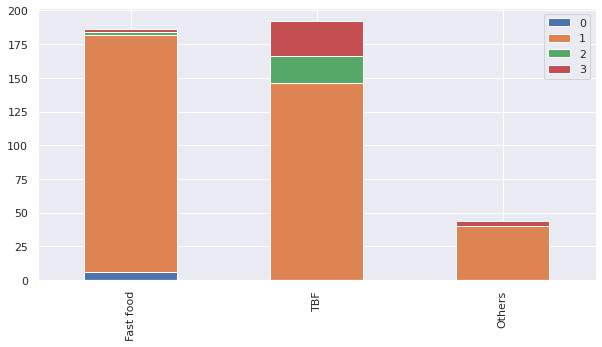

In [ ]:
bar_chart('Age')

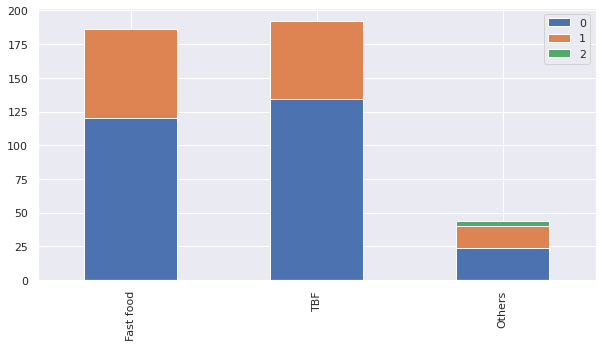

In [ ]:
bar_chart('Gender')

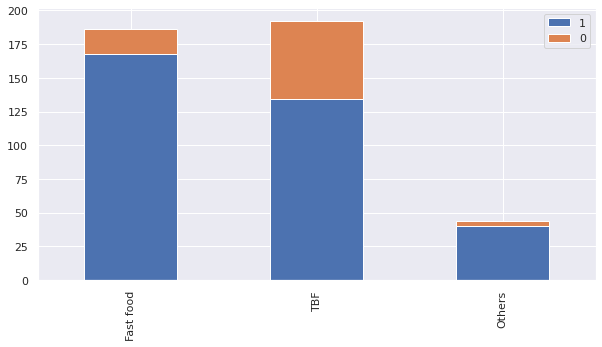

In [ ]:
bar_chart('Marital_status')

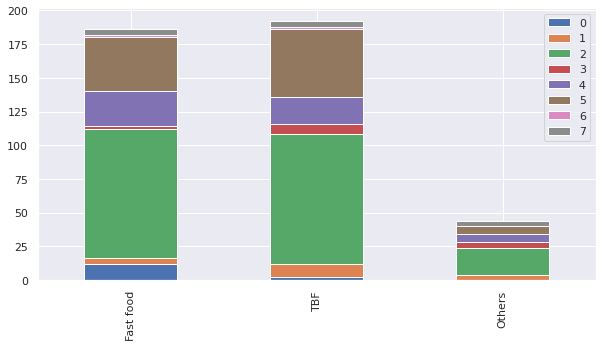

In [ ]:
bar_chart('Division')

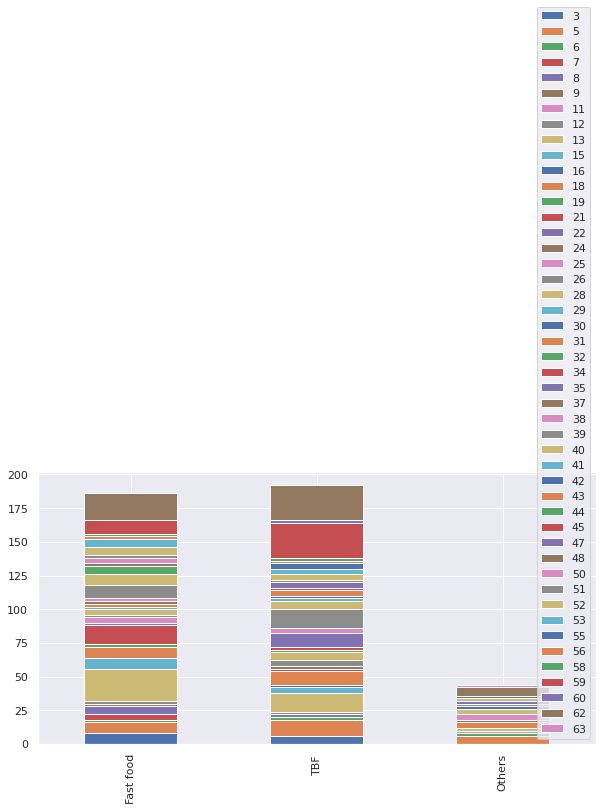

In [ ]:
bar_chart('Home_town')

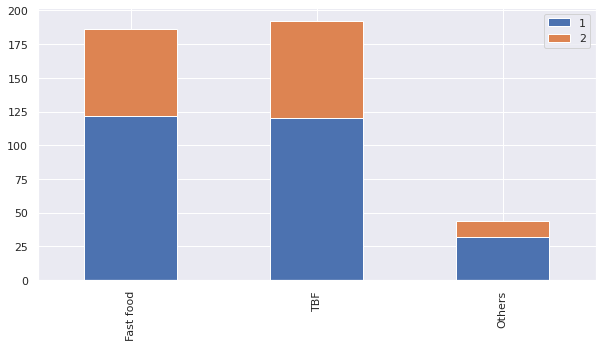

In [ ]:
bar_chart('Is_urban')

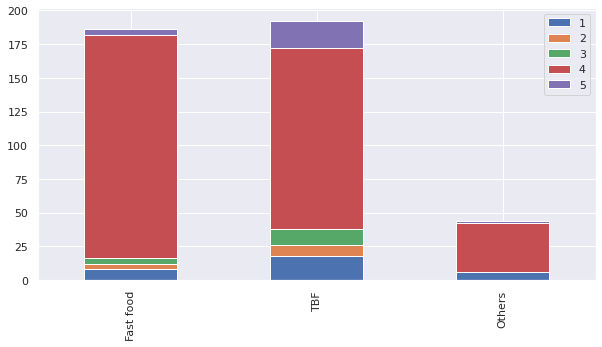

In [ ]:
bar_chart('Work')

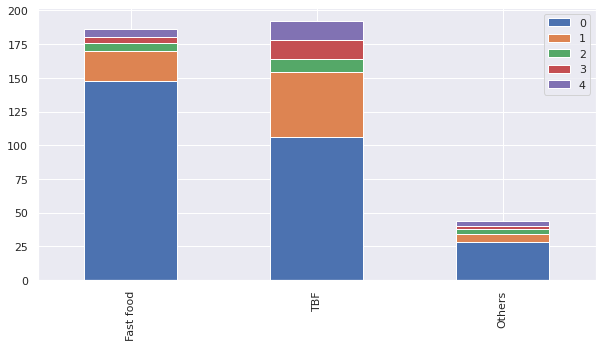

In [ ]:
bar_chart('Income')

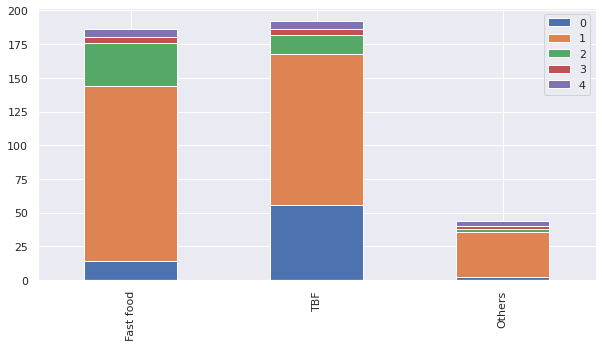

In [ ]:
bar_chart('take_food_from_restuarent_month')

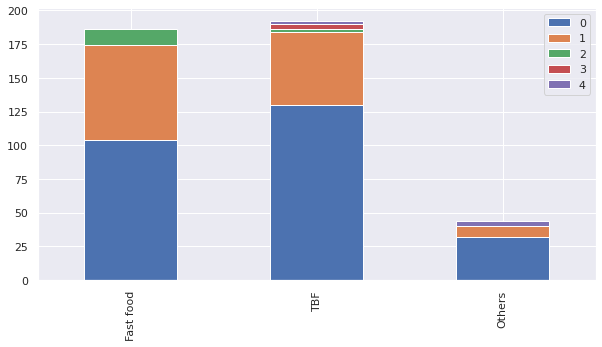

In [ ]:
bar_chart('Order_food_from_online_month')

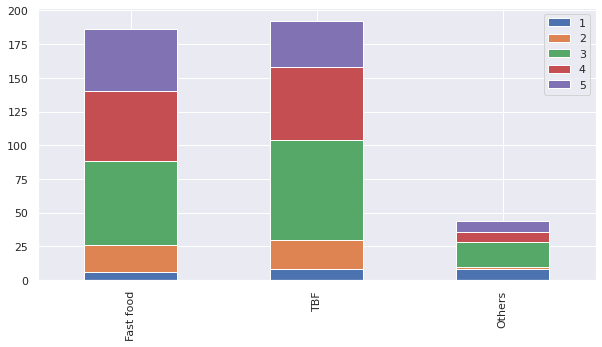

In [ ]:
bar_chart('Spicy')

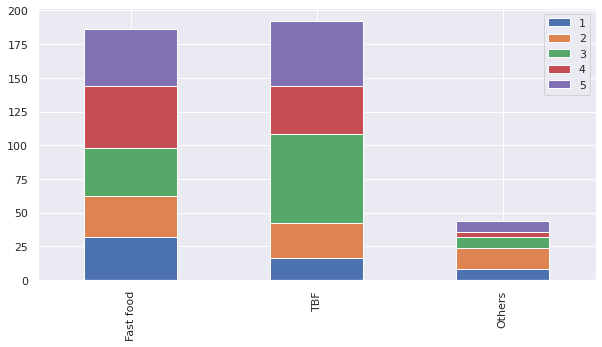

In [ ]:
bar_chart('Sweet')

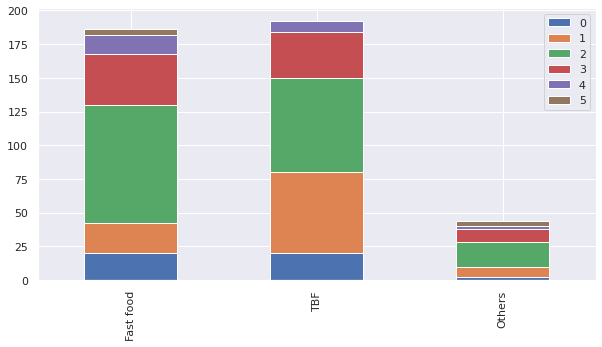

In [ ]:
bar_chart('Preferable_price_BDT')

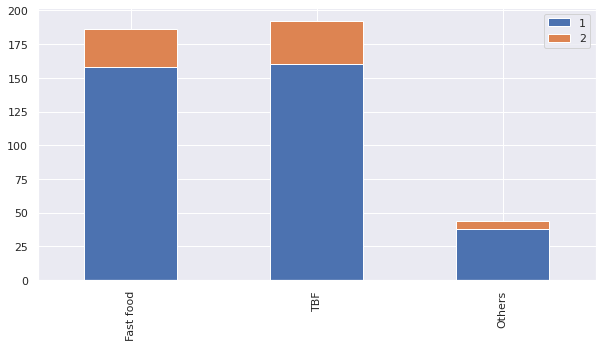

In [ ]:
bar_chart('New_recipe')

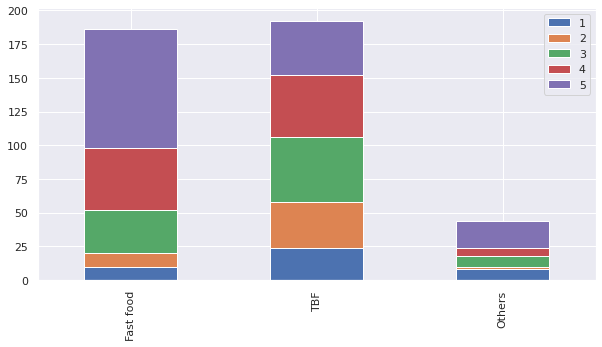

In [ ]:
bar_chart('Street_food')

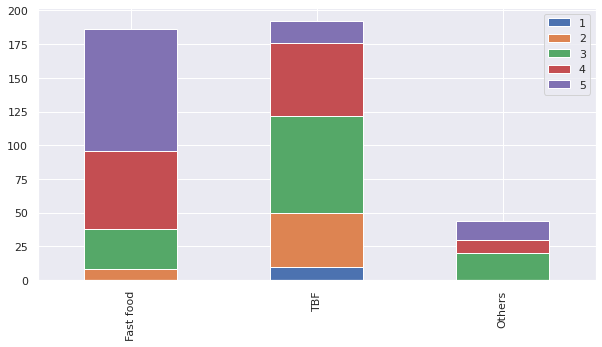

In [ ]:
bar_chart('Restuarent_food')

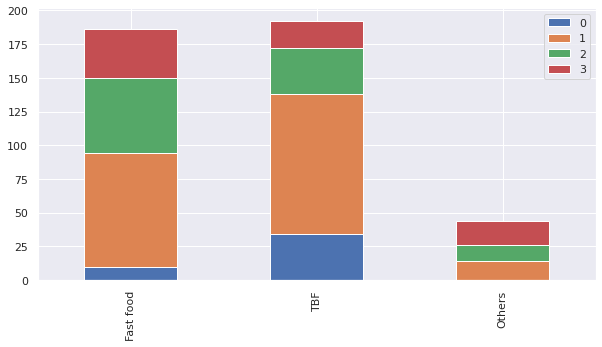

In [ ]:
bar_chart('Cost_rest_month')

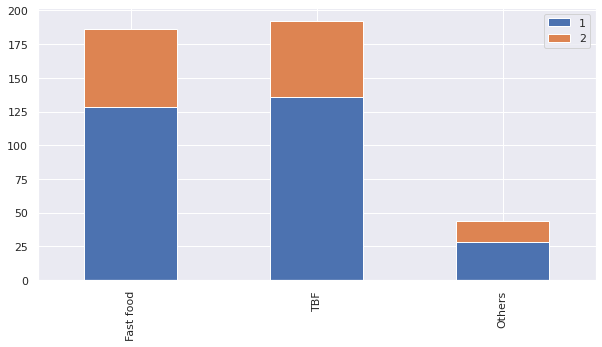

In [ ]:
bar_chart('Street_or_resturant')

In [ ]:
def scatter_diagram(feature):
  plt.scatter(df[feature],df['Food_type'])
  plt.xlabel(feature)
  plt.ylabel("Food type")
  plt.show()

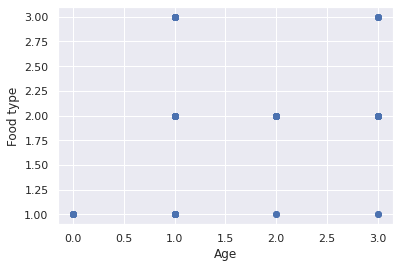

In [ ]:
scatter_diagram('Age')

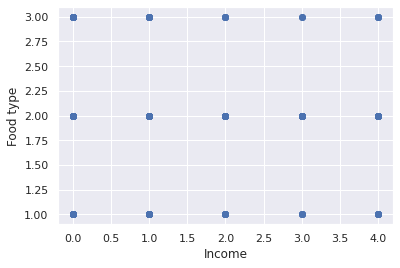

In [ ]:
scatter_diagram('Income')

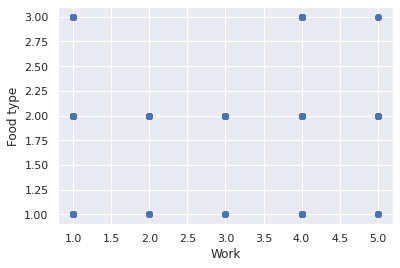

In [ ]:
scatter_diagram('Work')

In [ ]:
# df['Sweet']=np.float32(df['Sweet'])

#**Preparing data for model**

In [ ]:
X = df.drop(['Food_type','Street_or_resturant'],axis=1)
y = df['Food_type']

In [ ]:
X.shape, y.shape

((422, 18), (422,))

In [ ]:
X.columns

Index(['Age', 'Gender', 'Marital_status', 'Division', 'Home_town',
       'Living_Town', 'Is_urban', 'Work', 'Income',
       'take_food_from_restuarent_month', 'Order_food_from_online_month',
       'Spicy', 'Sweet', 'Preferable_price_BDT', 'New_recipe', 'Street_food',
       'Restuarent_food', 'Cost_rest_month'],
      dtype='object')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              422 non-null    int64  
 1   Gender                           422 non-null    int64  
 2   Marital_status                   422 non-null    int64  
 3   Division                         422 non-null    int64  
 4   Home_town                        422 non-null    int64  
 5   Living_Town                      422 non-null    int64  
 6   Is_urban                         422 non-null    int64  
 7   Work                             422 non-null    int64  
 8   Income                           422 non-null    int64  
 9   take_food_from_restuarent_month  422 non-null    int64  
 10  Order_food_from_online_month     422 non-null    int64  
 11  Spicy                            422 non-null    int64  
 12  Sweet                 

#**Spliting data**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=.15,random_state=0)
x_train.shape,y_train.shape

((358, 18), (358,))

#**Desicion Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring,error_score='raise')
print(score)

[0.97222222 0.88888889 0.80555556 0.94444444 0.88888889 0.97222222
 0.94444444 0.86111111 0.85714286 0.91428571]


In [ ]:
round(np.mean(score)*100, 2)

90.49

In [ ]:
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
accuracy_score(y_test, prediction)*100

93.75

In [ ]:
print("Confusion Matrix -->")
cm = confusion_matrix(y_test, prediction)
print(cm)
print("Classification Report -->")
print(classification_report(y_test, prediction))

Confusion Matrix -->
[[29  4  0]
 [ 0 28  0]
 [ 0  0  3]]
Classification Report -->
              precision    recall  f1-score   support

           1       1.00      0.88      0.94        33
           2       0.88      1.00      0.93        28
           3       1.00      1.00      1.00         3

    accuracy                           0.94        64
   macro avg       0.96      0.96      0.96        64
weighted avg       0.95      0.94      0.94        64



Text(66.5, 0.5, 'Truth')

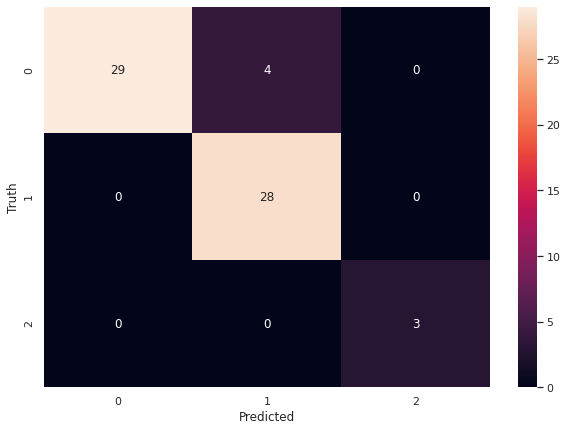

In [ ]:
import seaborn as sn
sn.set()
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# tree.plot_tree(clf)
# clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>

#**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[1.         1.         1.         0.95238095 0.9047619  0.95238095
 1.         0.9047619  0.97619048 0.92857143]


In [ ]:
round(np.mean(score)*100, 2)

96.19

In [ ]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(x_train, y_train)

prediction = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
accuracy_score(y_test, prediction)*100

95.3125

In [ ]:
print("Confusion Matrix -->")
cmr = confusion_matrix(y_test, prediction)
print(cmr)

print("Classification Report -->")
print(classification_report(y_test, prediction))

Confusion Matrix -->
[[31  2  0]
 [ 1 27  0]
 [ 0  0  3]]
Classification Report -->
              precision    recall  f1-score   support

           1       0.97      0.94      0.95        33
           2       0.93      0.96      0.95        28
           3       1.00      1.00      1.00         3

    accuracy                           0.95        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.95      0.95      0.95        64



Text(66.5, 0.5, 'Truth')

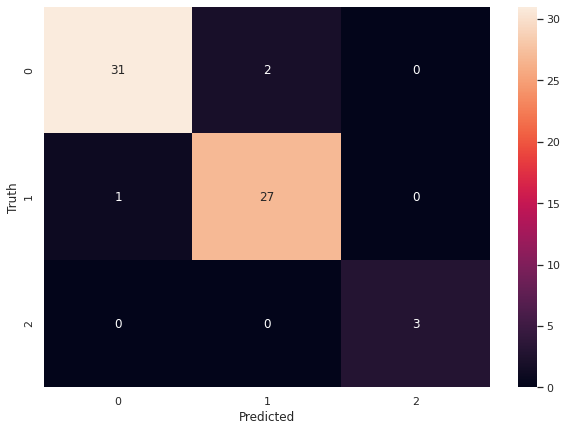

In [ ]:
import seaborn as sn
sn.set()
plt.figure(figsize=(10,7))
sn.heatmap(cmr,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#**CNN**

In [ ]:
cnndataX = x_train.copy() 
cnndataY = y_train.copy()
cnndataX.shape, cnndataY.shape

((358, 15), (358,))

In [ ]:
cnndataX.head()

,Age,Gender,Marital_status,Division,Is_urban,Work,Income,take_food_from_restuarent_month,Order_food_from_online_month,Spicy,Sweet,Preferable_price_BDT,New_recipe,Cost_rest_month,Street_or_resturant
141,1,0,1,4,1,4,0,1,0,3,4.0,2,1,1,1
318,1,0,1,1,1,1,1,2,1,4,3.0,1,1,2,1
385,1,0,1,5,1,4,0,2,1,5,5.0,3,1,1,2
174,1,0,1,5,1,4,0,2,1,5,5.0,3,1,1,2
67,1,0,1,2,2,4,0,4,0,3,5.0,1,1,3,1


In [ ]:
cnndataX['Age'] = cnndataX['Age']/3
cnndataX['Division'] = cnndataX['Division'] / 7
cnndataX['Work'] = cnndataX['Work'] / 5
cnndataX['Income'] = cnndataX['Income'] / 4
cnndataX['take_food_from_restuarent_month'] = cnndataX['take_food_from_restuarent_month'] / 4
cnndataX['Order_food_from_online_month'] = cnndataX['Order_food_from_online_month'] / 4
cnndataX['Spicy'] = cnndataX['Spicy'] / 5
cnndataX['Sweet'] = cnndataX['Sweet'] / 5.0
cnndataX['Preferable_price_BDT'] = cnndataX['Preferable_price_BDT'] / 5
cnndataX['Cost_rest_month'] = cnndataX['Cost_rest_month'] / 3


In [ ]:
cnndataX.head()

,Age,Gender,Marital_status,Division,Is_urban,Work,Income,take_food_from_restuarent_month,Order_food_from_online_month,Spicy,Sweet,Preferable_price_BDT,New_recipe,Cost_rest_month,Street_or_resturant
141,0.333333,0,1,0.571429,1,0.8,0.00,0.25,0.00,0.6,0.8,0.4,1,0.333333,1
318,0.333333,0,1,0.142857,1,0.2,0.25,0.50,0.25,0.8,0.6,0.2,1,0.666667,1
385,0.333333,0,1,0.714286,1,0.8,0.00,0.50,0.25,1.0,1.0,0.6,1,0.333333,2
174,0.333333,0,1,0.714286,1,0.8,0.00,0.50,0.25,1.0,1.0,0.6,1,0.333333,2
67,0.333333,0,1,0.285714,2,0.8,0.00,1.00,0.00,0.6,1.0,0.2,1,1.000000,1


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
      keras.layers.Dense(64,input_shape=(15,),activation='relu',kernel_initializer='ones',bias_initializer='zeros'),
      keras.layers.Dense(32,activation='relu'),
      keras.layers.Dense(16,activation='relu'),
      keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(cnndataX,cnndataY,epochs=50)

Epoch 1/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4119
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4824
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4566
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4332
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4270
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4407
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4682
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4560
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3938
Epoch 10/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+0

#**K Neighber Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, \
f1_score, jaccard_similarity_score

# for k in range(1,11):
#   knn_model = KNeighborsClassifier(n_neighbors=k)
#   knn_model.fit(x_train, y_train)

#   knn_result = knn_model.predict(x_test)

#   print("Confusion Matrix -->")
#   print(confusion_matrix(y_test, knn_result))

#   print("Classification Report -->")
#   print(classification_report(y_test, knn_result))
#   print("Accuricy : ",jaccard_similarity_score(y_test, knn_result))
#   print("Train set Accuricy", jaccard_similarity_score(y_train, knn_model.predict(x_train)))
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)
knn_result = knn_model.predict(x_test)
print("Confusion Matrix -->")
print(confusion_matrix(y_test, knn_result))

print("Classification Report -->")
print(classification_report(y_test, knn_result))
print("Accuricy : ",jaccard_similarity_score(y_test, knn_result))
print("Train set Accuricy", jaccard_similarity_score(y_train, knn_model.predict(x_train)))

Confusion Matrix -->
[[31  0  2]
 [ 0 28  0]
 [ 0  0  3]]
Classification Report -->
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        33
           2       1.00      1.00      1.00        28
           3       0.60      1.00      0.75         3

    accuracy                           0.97        64
   macro avg       0.87      0.98      0.91        64
weighted avg       0.98      0.97      0.97        64

Accuricy :  0.96875
Train set Accuricy 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
knn_result = knn_model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, \
f1_score, jaccard_similarity_score
print("Confusion Matrix -->")
cmk = confusion_matrix(y_test, knn_result)
print(cmk)

print("Classification Report -->")
print(classification_report(y_test, knn_result))

Confusion Matrix -->
[[31  0  2]
 [ 0 28  0]
 [ 0  0  3]]
Classification Report -->
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        33
           2       1.00      1.00      1.00        28
           3       0.60      1.00      0.75         3

    accuracy                           0.97        64
   macro avg       0.87      0.98      0.91        64
weighted avg       0.98      0.97      0.97        64



In [ ]:
print("Accuricy : ",jaccard_similarity_score(y_test, knn_result)*100)


Accuricy :  96.875


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Text(66.5, 0.5, 'Truth')

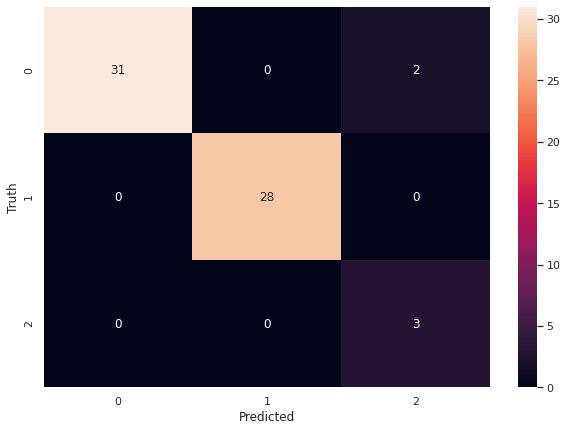

In [ ]:
import seaborn as sn
sn.set()
plt.figure(figsize=(10,7))
sn.heatmap(cmk,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#**Support Vector Machine**

In [ ]:
from sklearn import svm
svm_model = svm.SVC(C= 20, gamma= 'auto', kernel='rbf')
svm_model.fit(x_train, y_train)

SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_result = svm_model.predict(x_test)
print("Confusion Matrix : ")
cms = confusion_matrix(y_test, svm_result)
print(cms)
print(classification_report(y_test, svm_result))
print("Jaccard index : ", jaccard_similarity_score(y_test, svm_result)*100)

Confusion Matrix : 
[[31  2  0]
 [ 0 28  0]
 [ 0  0  3]]
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        33
           2       0.93      1.00      0.97        28
           3       1.00      1.00      1.00         3

    accuracy                           0.97        64
   macro avg       0.98      0.98      0.98        64
weighted avg       0.97      0.97      0.97        64

Jaccard index :  96.875


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Text(66.5, 0.5, 'Truth')

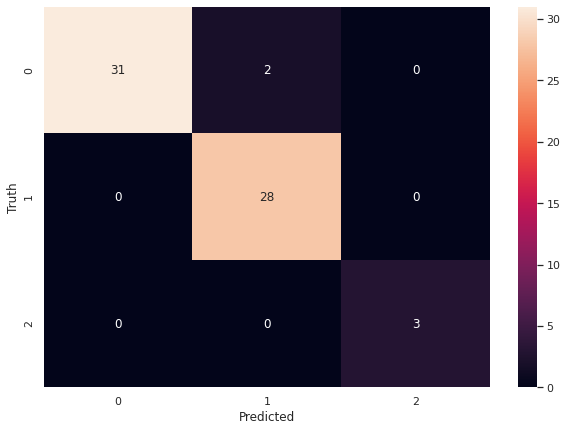

In [ ]:
import seaborn as sn
sn.set()
plt.figure(figsize=(10,7))
sn.heatmap(cms,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#**Hyper parameters tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

test_model = GridSearchCV(svm.SVC(),{
    'C':[1,10,20],
    'kernel':['rbf','poly','linear'],
    'gamma':['scale','auto']
},cv=5,return_train_score=False)
test_model.fit(x_train,y_train)
# test_model.cv_results_

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 20], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
result = pd.DataFrame(test_model.cv_results_)
result[['params','mean_test_score']]

,params,mean_test_score
0,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.533725
1,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.525039
2,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.678560
3,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.754264
4,"{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}",0.837833
5,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.678560
6,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.636894
7,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",0.575391
8,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.684194
9,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.826761


#**Logistic Regression**

In [ ]:
from sklearn import linear_model
log_reg = linear_model.LogisticRegression(solver='newton-cg')

In [ ]:
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_predict = log_reg.predict(x_test)

In [ ]:
accuracy_score(y_test, log_predict)*100

68.75

In [ ]:
cmlr = confusion_matrix(y_test,log_predict)
cmlr

array([[22,  9,  2],
       [ 6, 22,  0],
       [ 3,  0,  0]])

Text(66.5, 0.5, 'Truth')

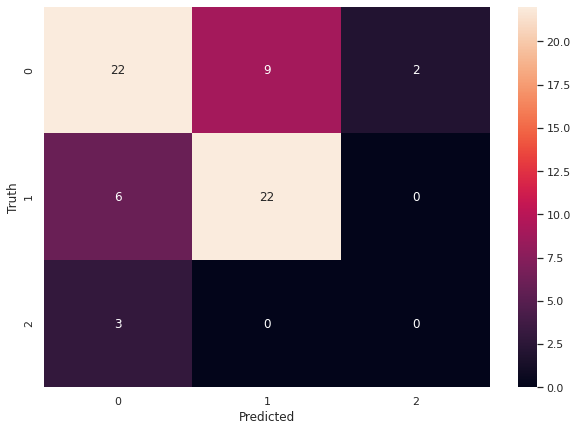

In [ ]:
import seaborn as sn
sn.set()
plt.figure(figsize=(10,7))
sn.heatmap(cmlr,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')